In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
# make_blobs, which we imported above, says: "generates isotropic Gaussian blobs for clustering"

In [3]:
X,y = make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.5,
                random_state=0)

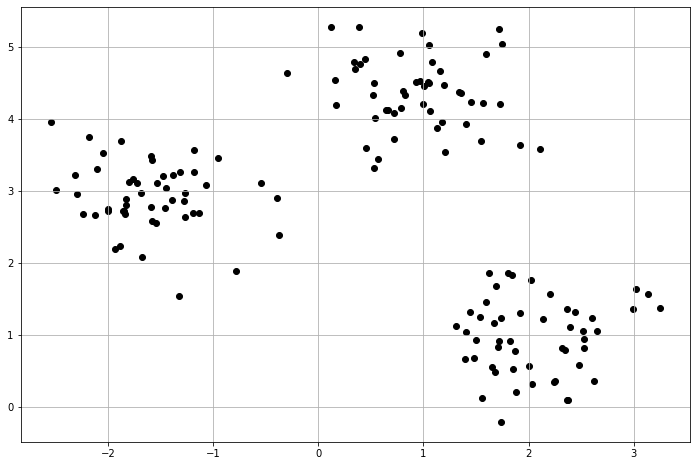

In [4]:
plt.rcParams['figure.figsize']=(12,8)

plt.scatter(X[:,0],
           X[:,1],
           c='black',
           marker='o')
plt.grid()
plt.show()

In [6]:
km = KMeans(n_clusters=3,
           n_init=10,
           random_state=0)

In [7]:
y_km = km.fit_predict(X)
# Method .fit_predict() is combination of two methods which can be run separately as well:
#   .fit() - creates the model using the dataset in the argument of the function
#   .predict() - predicts the cluster for every row of the dataset in the argument of the function

In [8]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

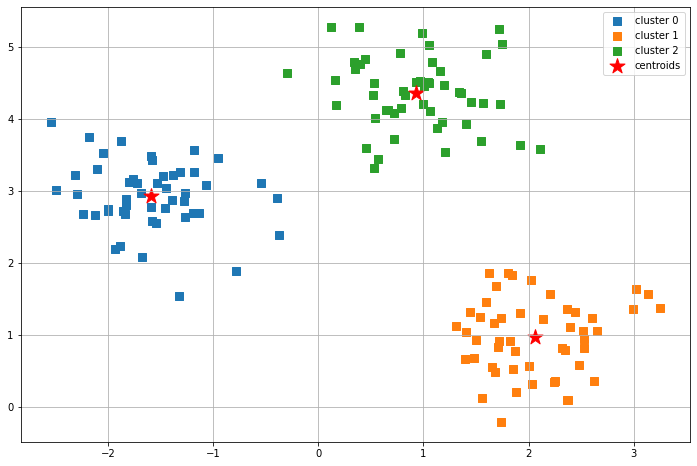

In [9]:
 # plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)

In [10]:
# We will fit the data with various numbers of clusters and store the distortion. 
# Distortion, in sklearn called inertia, tells how far away the points within a cluster are. 
# Therefore, a small of inertia is aimed for. 
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

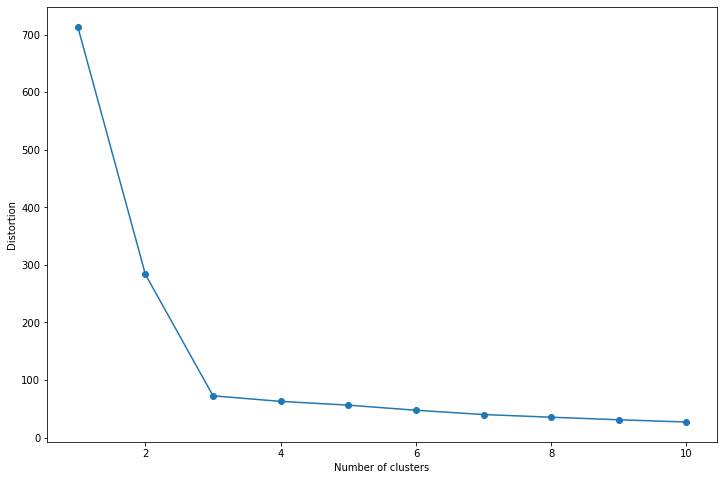

In [11]:
# elbow rule
plot_distortion(X,max_clusters=10)

In [16]:
from sklearn import metrics

In [24]:
def plot_silhouette(X,max_clusters = 10):
    sil_score = []
    for i in range(2, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        labels = km.labels_
        sil_score.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    plt.plot(range(2,max_clusters +1), sil_score, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()

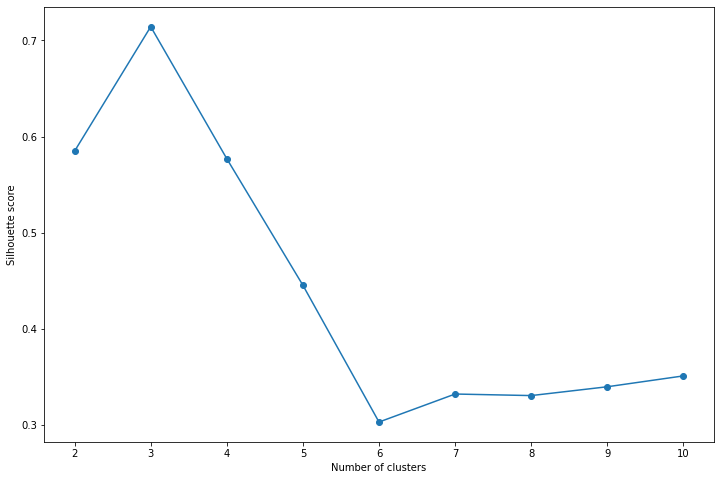

In [25]:
plot_silhouette(X,max_clusters=10)